# Cat and dog classification

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#!pip install tensorflow
#!pip install keras

TensorFlow is a Python library for fast numerical computing created and released by Google. It is a foundation library that can be used to create Deep Learning models directly or by using wrapper libraries that simplify the process built on top of TensorFlow.

In [3]:
import tensorflow as tf
print(tf.__version__)

2.15.0


Keras is an open-source library that provides a Python interface for artificial neural networks. Keras acts as an interface for the TensorFlow library. ... Designed to enable fast experimentation with deep neural networks, it focuses on being user-friendly, modular, and extensible

In [4]:
import keras
print(keras.__version__)

2.15.0


In [5]:
# for extracting .zip in drive
#!pip install patool
#import patoolib

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import cv2
from zipfile import *

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import layers

#from keras import backend as K
from keras.metrics import categorical_crossentropy
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, MaxPooling2D, Flatten, Conv2D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [7]:
#patoolib.extract_archive(source, destination)
#patoolib.extract_archive("/content/drive/MyDrive/Colab_Notebooks/ImageCodes/test.zip",outdir="/content/drive/MyDrive/Colab_Notebooks/ImageCodes/catsVsDogs/")

In [8]:
#patoolib.extract_archive("/content/drive/MyDrive/Colab_Notebooks/ImageCodes/train.zip",outdir="/content/drive/MyDrive/Colab_Notebooks/ImageCodes/catsVsDogs/")

In [9]:
target_size=(256,256) #provided by network resizing

Image data augmentation is used to expand the training dataset in order to improve the performance and ability of the model to generalize. Image data augmentation is supported in the Keras deep learning library via the ImageDataGenerator class

In [10]:
#bast5dm el swar 3shan a3mlha zoom in w out w rescale 3shan a5od mnha kol el positions
#ll validation w el training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)

In [31]:
#ba2sm el swar w b7dd el directory bt3o w b7dd el batch size
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab_Notebooks/ImageCodes/catsVsDogs/train',
    target_size=target_size,
    color_mode='rgb',
    batch_size=64,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab_Notebooks/ImageCodes/catsVsDogs/train', # same directory as training data
    target_size=target_size,
    color_mode='rgb',
    batch_size=64,
    class_mode='binary',
    subset='validation') # set as validation data

datagen = ImageDataGenerator()
test_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab_Notebooks/ImageCodes/catsVsDogs/test/',
    target_size=target_size,
    color_mode='rgb',
    batch_size=64,
    class_mode='binary')

# Set “binary” if you have only two classes to predict, if not set to“categorical”

Found 4461 images belonging to 2 classes.
Found 1115 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [32]:
train_generator.image_shape # bcheck 3la el shape

(256, 256, 3)

In [33]:
train_generator.class_indices #bcheck 3la el classes el training

{'cats': 0, 'dogs': 1}

In [34]:
model = tf.keras.Sequential([
   tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(256,256,3)),
   tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
   tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
   tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
   tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
   tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(64, activation='relu'),
   tf.keras.layers.Dropout(rate=0.5),
   tf.keras.layers.Dense(1, activation='sigmoid')
])

Batch size is a term used in machine learning and refers to the number of training examples utilized in one iteration

In machine learning and statistics, the learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function

Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label

In [35]:
# Adam optimizer, loss function will be categorical cross entropy, evaluation metric will be accuracy
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=opt ,metrics=["accuracy"])

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 30, 30, 64)       

In [37]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=40,
                    batch_size=32,callbacks=[EarlyStopping(monitor='val_loss', patience=7, verbose=0)])

Epoch 1/40
70/70 [==============================] - 120s 2s/step - loss: 0.6989 - accuracy: 0.5978 - val_loss: 0.5729 - val_accuracy: 0.6709
Epoch 2/40
70/70 [==============================] - 106s 2s/step - loss: 0.6064 - accuracy: 0.6541 - val_loss: 0.5558 - val_accuracy: 0.6798
Epoch 3/40
70/70 [==============================] - 109s 2s/step - loss: 0.5822 - accuracy: 0.6880 - val_loss: 0.5381 - val_accuracy: 0.7175
Epoch 4/40
70/70 [==============================] - 106s 2s/step - loss: 0.5651 - accuracy: 0.7048 - val_loss: 0.5460 - val_accuracy: 0.7004
Epoch 5/40
70/70 [==============================] - 107s 2s/step - loss: 0.5550 - accuracy: 0.7126 - val_loss: 0.5597 - val_accuracy: 0.7022
Epoch 6/40
70/70 [==============================] - 109s 2s/step - loss: 0.5515 - accuracy: 0.7176 - val_loss: 0.5344 - val_accuracy: 0.7049
Epoch 7/40
70/70 [==============================] - 105s 2s/step - loss: 0.5385 - accuracy: 0.7232 - val_loss: 0.5263 - val_accuracy: 0.7121
Epoch 8/40
70

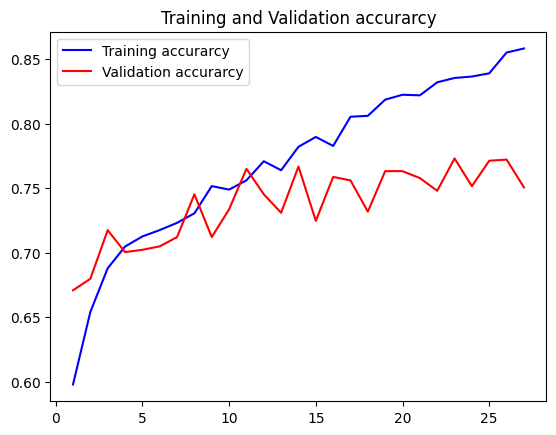

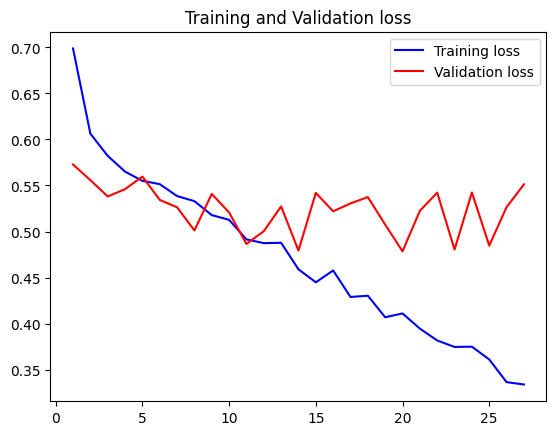

In [38]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
#Train and validation accuracy
plt.plot(epochs, accuracy, 'b', label='Training accurarcy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure() # to plot new figure
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 19ms/step
[[0.11091177]]
cat


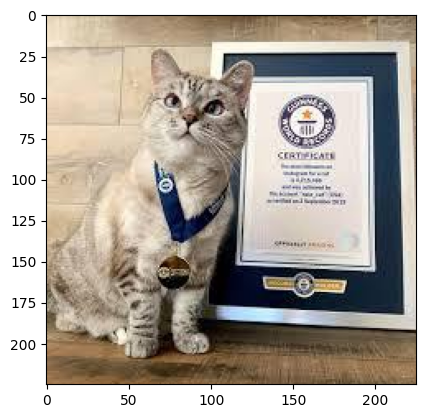

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

# Pre-Processing test data same as train data.
img_width=256
img_height=256

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)

result = model.predict([prepare('/content/drive/MyDrive/Colab_Notebooks/ImageCodes/catsVsDogs/test/cats/cat_124.jpg')])
Animal=image.load_img('/content/drive/MyDrive/Colab_Notebooks/ImageCodes/catsVsDogs/test/cats/cat_124.jpg')
plt.imshow(Animal)

print(result)

if result[0][0]< 0.5:
  print("cat")
else:
  print("Dog")

1/1 [==============================] - 0s 22ms/step
[[0.00336627]]
cat


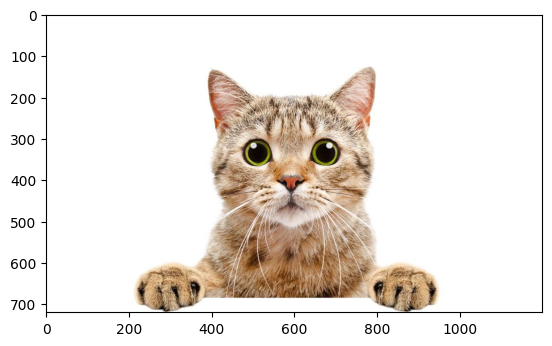

In [43]:
result = model.predict([prepare('/content/drive/MyDrive/Colab_Notebooks/ImageCodes/catsVsDogs/test/cats/cat_106.jpg')])
Animal=image.load_img('/content/drive/MyDrive/Colab_Notebooks/ImageCodes/catsVsDogs/test/cats/cat_106.jpg')
plt.imshow(Animal)
print(result)
if result[0][0]< 0.5:
  print("cat")
else:
  print("Dog")

1/1 [==============================] - 0s 19ms/step
[[0.03943321]]
cat


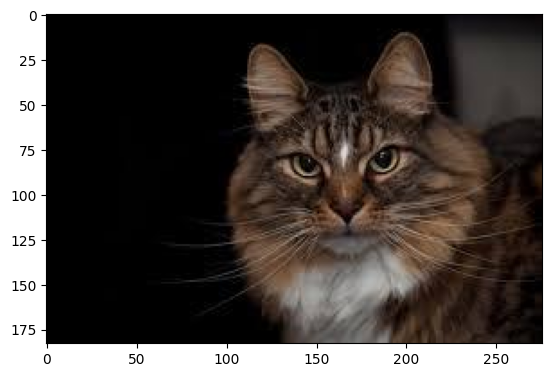

In [44]:
result = model.predict([prepare('/content/drive/MyDrive/Colab_Notebooks/ImageCodes/catsVsDogs/test/cats/cat_109.jpg')])
Animal=image.load_img('/content/drive/MyDrive/Colab_Notebooks/ImageCodes/catsVsDogs/test/cats/cat_109.jpg')
plt.imshow(Animal)

print(result)

if result[0][0]<0.5:
  print("cat")
else:
  print("Dog")

1/1 [==============================] - 0s 58ms/step
[[0.00209931]]
cat


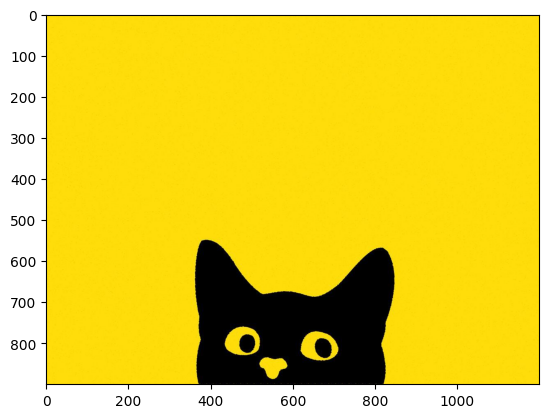

In [56]:
result = model.predict([prepare('/content/drive/MyDrive/Colab_Notebooks/ImageCodes/catsVsDogs/test/cats/cat_18.jpg')])
Animal=image.load_img('/content/drive/MyDrive/Colab_Notebooks/ImageCodes/catsVsDogs/test/cats/cat_18.jpg')
plt.imshow(Animal)
print(result)
if result[0][0]<0.5:
  print("cat")
else:
  print("Dog")

1/1 [==============================] - 0s 25ms/step
[[0.9999753]]
Dog


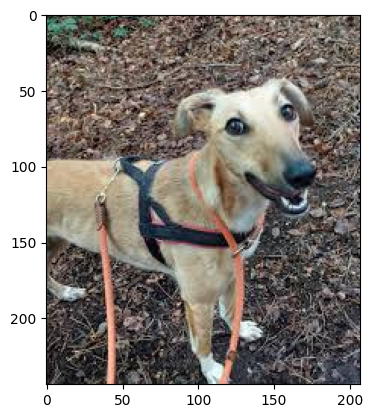

In [46]:
result = model.predict([prepare('/content/drive/MyDrive/Colab_Notebooks/ImageCodes/catsVsDogs/test/dogs/dog_114.jpg')])
Animal=image.load_img('/content/drive/MyDrive/Colab_Notebooks/ImageCodes/catsVsDogs/test/dogs/dog_114.jpg')
plt.imshow(Animal)
print(result)
if result[0][0]<0.5:
  print("cat")
else:
  print("Dog")

1/1 [==============================] - 0s 27ms/step
[[0.99959964]]
Dog


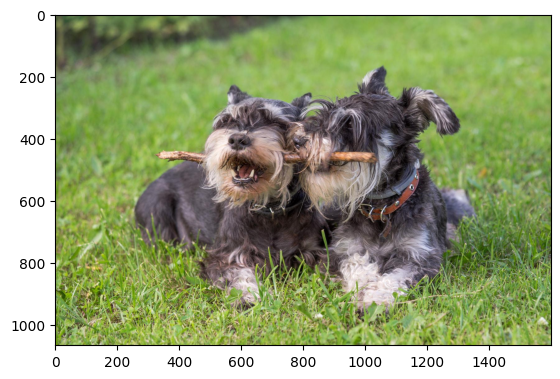

In [47]:
result = model.predict([prepare('/content/drive/MyDrive/Colab_Notebooks/ImageCodes/catsVsDogs/test/dogs/dog_141.jpg')])
Animal=image.load_img('/content/drive/MyDrive/Colab_Notebooks/ImageCodes/catsVsDogs/test/dogs/dog_141.jpg')
plt.imshow(Animal)
print(result)
if result[0][0]< 0.5:
  print("cat")
else:
  print("Dog")

1/1 [==============================] - 0s 19ms/step
[[0.9999753]]
Dog


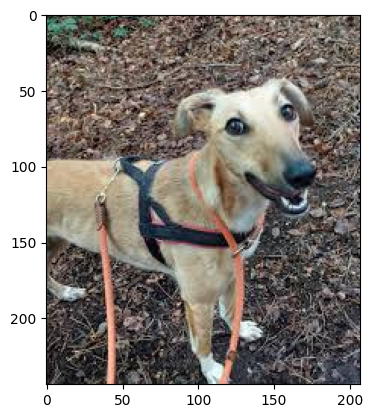

In [52]:
result = model.predict([prepare('/content/drive/MyDrive/Colab_Notebooks/ImageCodes/catsVsDogs/test/dogs/dog_114.jpg')])
Animal=image.load_img('/content/drive/MyDrive/Colab_Notebooks/ImageCodes/catsVsDogs/test/dogs/dog_114.jpg')
plt.imshow(Animal)
print(result)
if result[0][0] < 0.5:
  print("cat")
else:
  print("Dog")

1/1 [==============================] - 0s 18ms/step
[[0.7903059]]
Dog


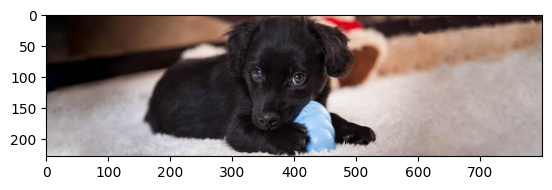

In [57]:
result = model.predict([prepare('/content/drive/MyDrive/Colab_Notebooks/ImageCodes/catsVsDogs/test/dogs/dog_518.jpg')])
Animal=image.load_img('/content/drive/MyDrive/Colab_Notebooks/ImageCodes/catsVsDogs/test/dogs/dog_518.jpg')
plt.imshow(Animal)
print(result)
if result[0][0] < 0.5:
  print("cat")
else:
  print("Dog")